# Analysis of the chains

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lisatools.sampling.utility import ModifiedHDFBackend
# from getdist import plots, MCSamples
# import getdist
import corner

In [3]:
filename ='bias_GR_AAK_snr_150_no_noise_1000000.0_30.0_0.9_13.580007268376363_0.007_T4.0.h5'#'bias_GR_AAK_snr_150_no_noise_1000000.0_10.0_0.9_7.2_0.03_T1.03.h5'
back = ModifiedHDFBackend(filename)


In [4]:
chains = back.get_chain()
loglike = back.get_log_prob()


In [5]:
print(chains.shape, loglike.shape)

n = chains.shape[2]
n_dim = chains.shape[-1]

temp =0

(15716, 3, 16, 5) (15716, 3, 16)


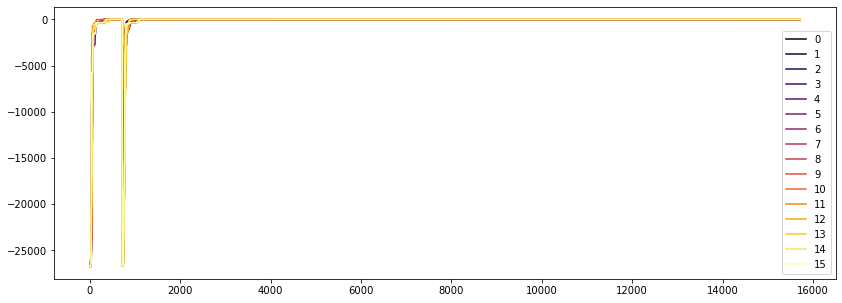

In [6]:
colors = plt.cm.inferno(np.linspace(0,1,n))

var=1
temp =0
plt.figure(figsize=(14,5))

for i in range(0,n):
    plt.plot(loglike[:,temp,i],label=str(i),color=colors[i])

plt.legend()
plt.show()




0 -2.95376041464377
1 -2.9698279168610826
2 -2.9412954743974717
3 -2.9472546477387955
4 -2.9601559462544644
5 -2.945983494612767
6 -2.921179020919852
7 -3.0340470529180226
8 -2.956231525176819
9 -2.9709166973565027
10 -2.9191046936992984
11 -2.951503351140619
12 -2.9315744474187224
13 -2.9897991307230503
14 -2.9391683697539213
15 -2.966239131045211


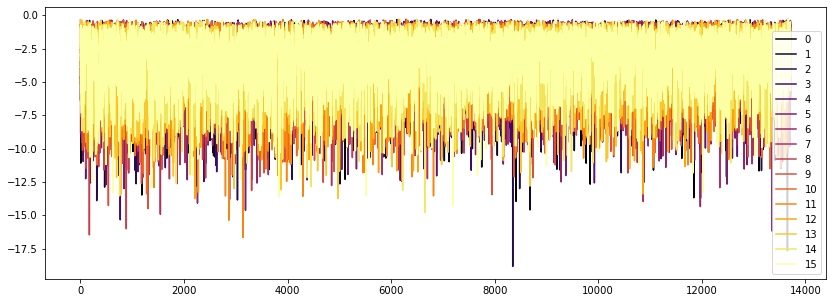

In [7]:
burnin = 2000
# select chains
good_chains = []
for i in range(0,n):
    if np.mean(loglike[burnin:,temp,i])>-4000.0:
        print(i, np.mean(loglike[burnin:,temp,i]))
        good_chains.append(i)


plt.figure(figsize=(14,5))

for i in good_chains:
    plt.plot(loglike[burnin:,temp,i],label=str(i),color=colors[i])

plt.legend()
plt.show()

In [8]:
np.max(loglike[burnin:,0,i])

-0.31524355154454553

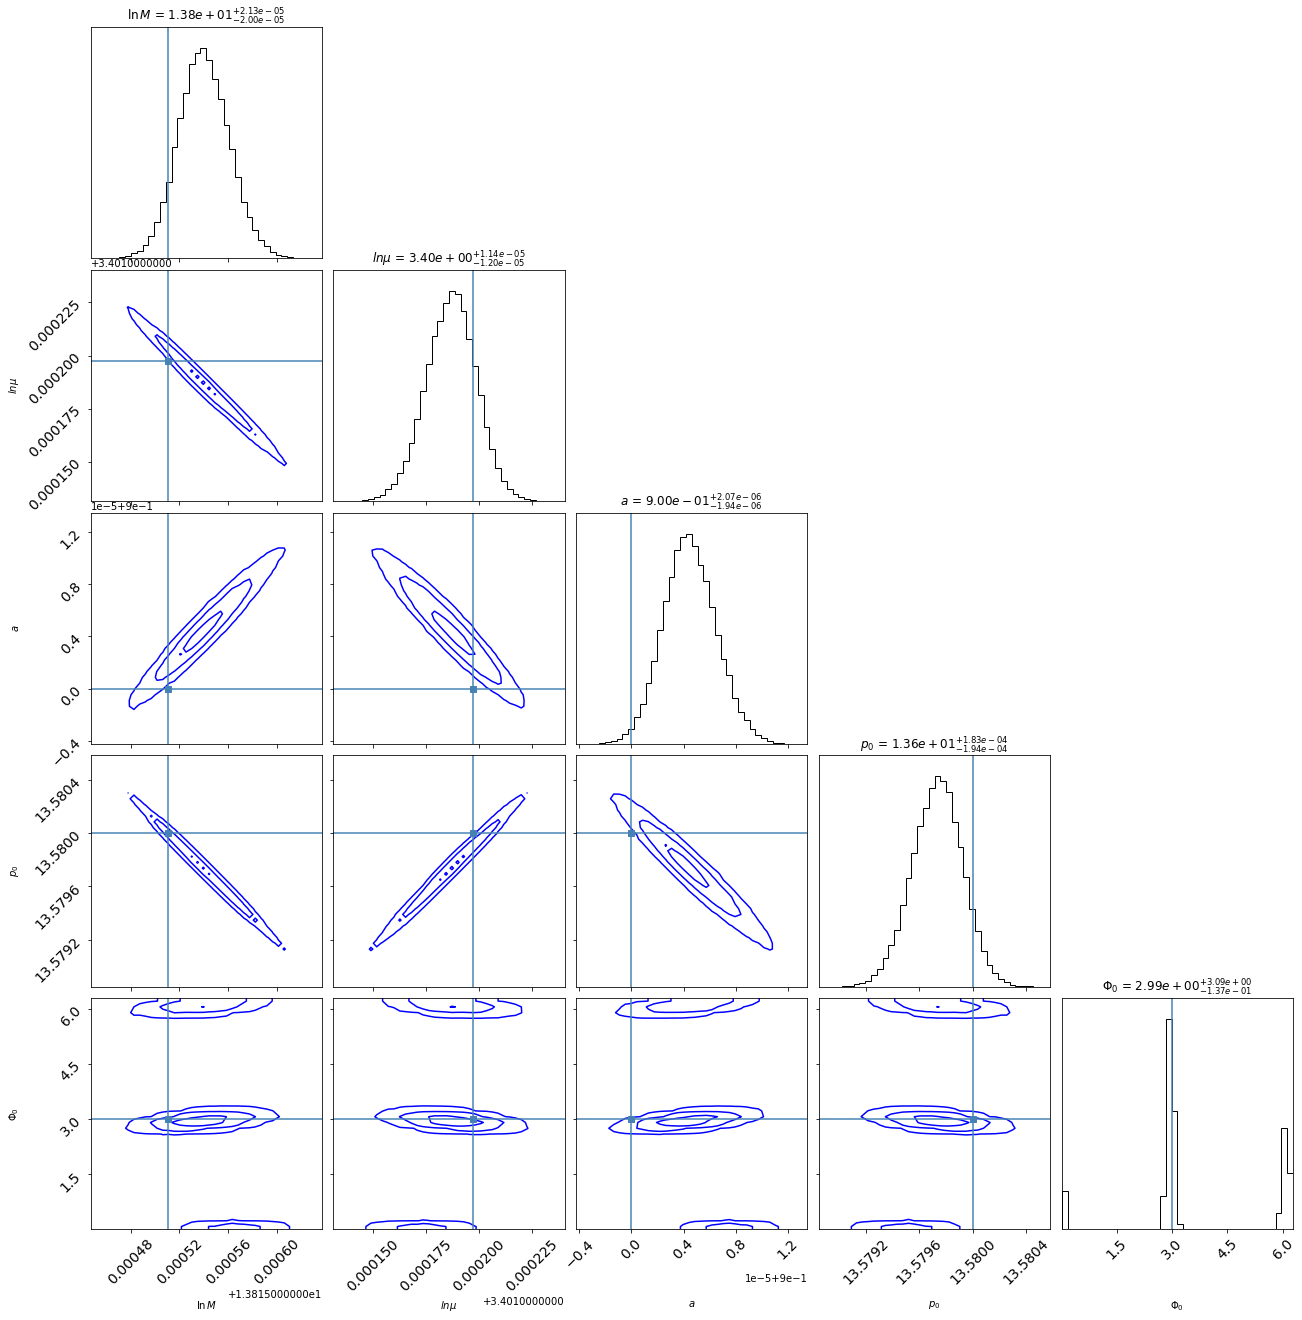

In [9]:
samp = np.array([chains[burnin:,0,good_chains,variable].flatten() for variable in range(n_dim)]).T

inj =[np.log(1000000.0),np.log(30.0),0.9,13.58,3.0]#,0.0]

labels = [
    r"$\ln M$",
    r"$ln\mu$",
    r"$a$",
    r"$p_0$",
   r"$\Phi_0$",
    # r"$q$",
    ]

corner_kwargs=dict(labels=labels,
            levels=(1 - np.exp(-0.5 * np.array([1, 2, 3]) ** 2)),
            bins=40,
            plot_density=False,
            plot_datapoints=False,
            smooth=0.4,
            contour_kwargs={"colors": "blue"},
            hist_kwargs={"density": True},
            truths=inj,
            show_titles=True,
            title_fmt=".2e",
            # quantiles=quantiles

)

figure = corner.corner(samp, **corner_kwargs)

for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=14)
    
figure.subplots_adjust(right=1.5,top=1.5)

plt.savefig('bias_test_snr_150_1000000.0_30.0_0.9_13.580007268376363_0.007_T4.0.pdf',dpi=300,pad_inches=0.3,bbox_inches='tight')

In [10]:
np.median(samp, axis=0)

array([13.81553942,  3.40118709,  0.90000442, 13.57973724,  2.99013198])

In [11]:
(inj - np.median(samp, axis=0))/np.std(samp, axis=0)

array([-1.38714506,  0.86968862, -2.17960884,  1.38155542,  0.00573802])

In [12]:
from scipy.stats import skew, moment, kurtosis
skew(samp[:,2])

0.12039920300368043

# True GR

In [13]:
!ls ../beyond_gr/GR_AAK_snr_150_no_noise_1000028.8624522388_29.99969125172411_0.90000442_13.57973724_0.0_T4.0.h5

../beyond_gr/GR_AAK_snr_150_no_noise_1000028.8624522388_29.99969125172411_0.90000442_13.57973724_0.0_T4.0.h5


0 -2.600169198679325
1 -2.6424763365699926
2 -2.5290028955600277
3 -2.6308130359829796
4 -2.532356146827855
5 -2.427071244392355
6 -2.6249051360122873
7 -2.515720457461469
8 -2.724240454977598
9 -2.5172938491755885
10 -2.532297099883078
11 -2.6213430776621784
12 -2.608300160121291
13 -2.5156737519618115
14 -2.4374812399705927
15 -2.538737751379885


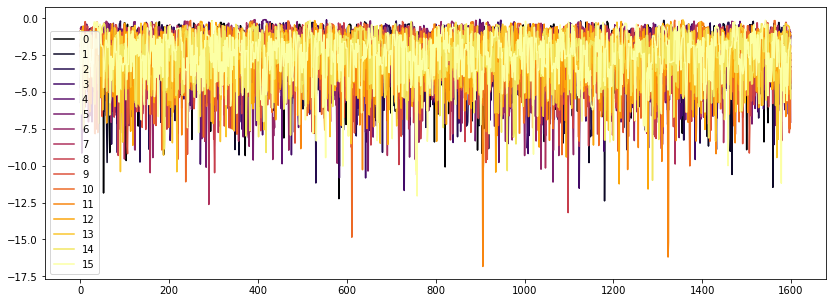

In [14]:
filename ='../beyond_gr/GR_AAK_snr_150_no_noise_1000028.8624522388_29.99969125172411_0.90000442_13.57973724_0.0_T4.0.h5'
back = ModifiedHDFBackend(filename)

chains = back.get_chain()
loglike = back.get_log_prob()

n = chains.shape[2]
n_dim = chains.shape[-1]

temp =0

burnin = 100
# select chains
good_chains = []
for i in range(0,n):
    if np.mean(loglike[burnin:,temp,i])>-4000.0:
        print(i, np.mean(loglike[burnin:,temp,i]))
        good_chains.append(i)


plt.figure(figsize=(14,5))

for i in good_chains:
    plt.plot(loglike[burnin:,temp,i],label=str(i),color=colors[i])

plt.legend()
plt.show()

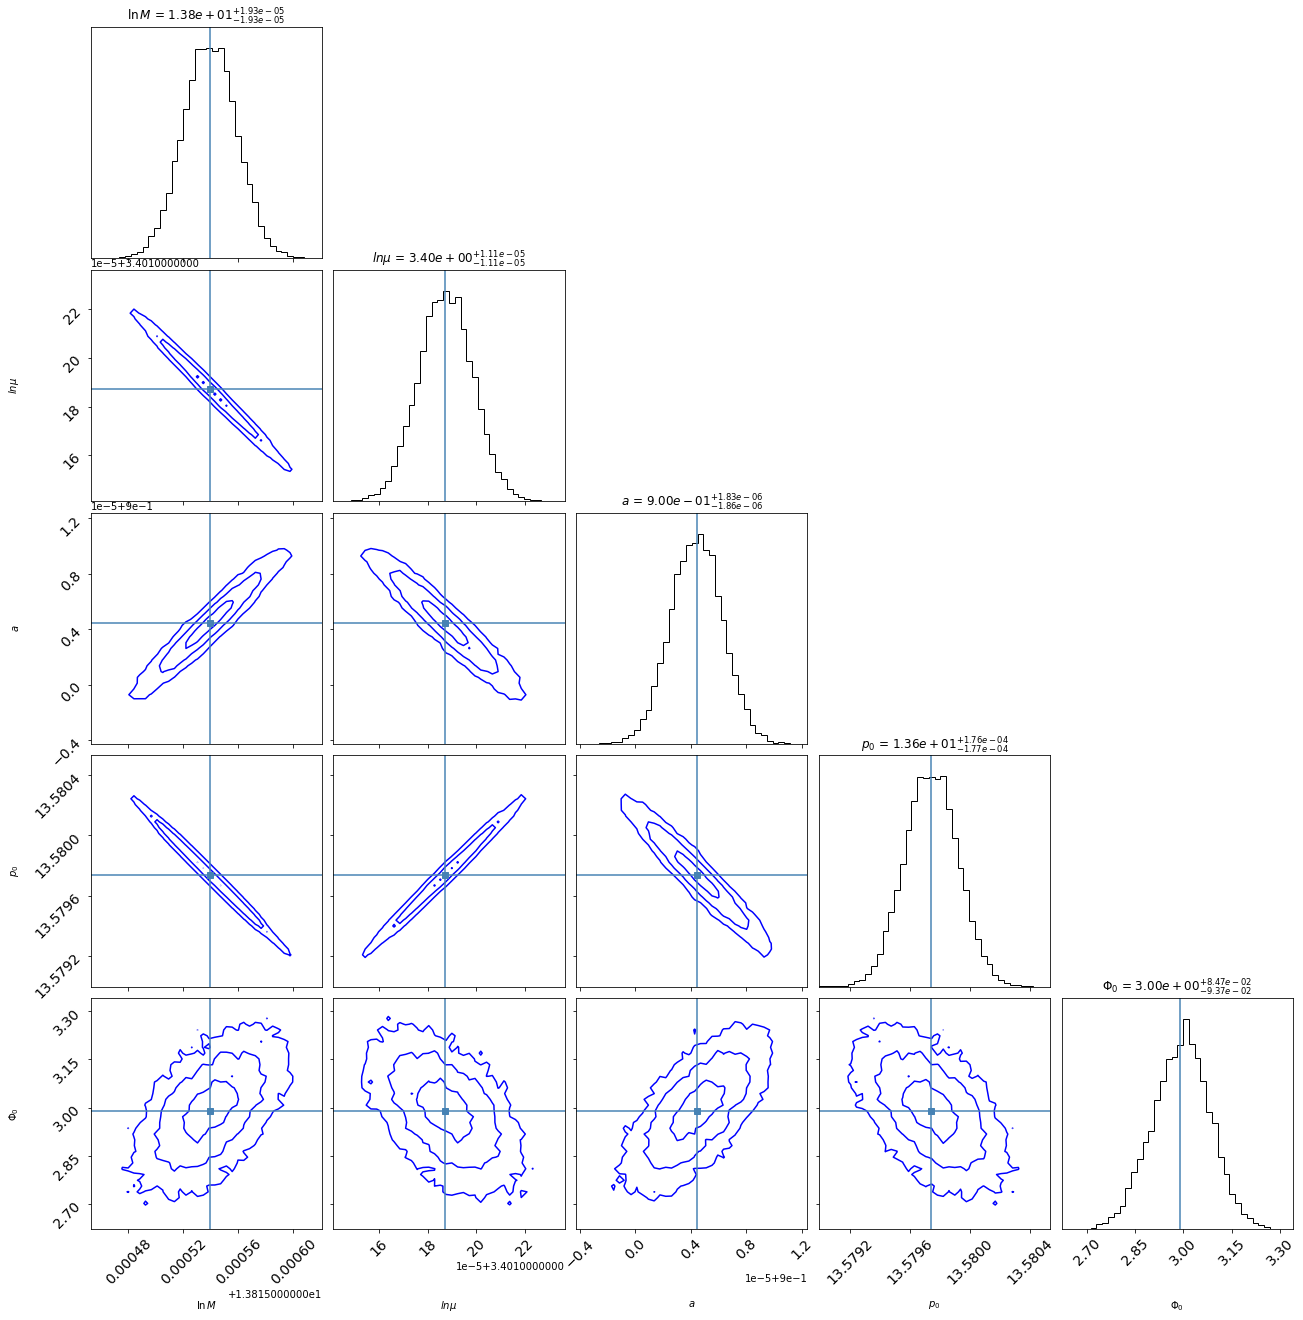

In [15]:
samp_GR = np.array([chains[burnin:,0,good_chains,variable].flatten() for variable in range(n_dim)]).T

inj =[13.81553942,  3.40118709,  0.90000442, 13.57973724,  2.99013198]

corner_kwargs=dict(labels=labels,
            levels=(1 - np.exp(-0.5 * np.array([1, 2, 3]) ** 2)),
            bins=40,
            plot_density=False,
            plot_datapoints=False,
            smooth=0.4,
            contour_kwargs={"colors": "blue"},
            hist_kwargs={"density": True},
            truths=inj,
            show_titles=True,
            title_fmt=".2e",
            # quantiles=quantiles

)

figure = corner.corner(samp_GR, **corner_kwargs)

for ax in figure.get_axes():
    ax.tick_params(axis='both', labelsize=14)
    
figure.subplots_adjust(right=1.5,top=1.5)

# plt.savefig('bias_test_snr_150_1000000.0_30.0_0.9_13.580007268376363_0.007_T4.0.pdf',dpi=300,pad_inches=0.3,bbox_inches='tight')

In [16]:
for mom in range(6):
    print("Moment", mom)
    for i in range(n_dim):
        ind_gr = (np.abs(samp_GR[:,-1]-3.00)<0.5)
        ind = (np.abs(samp[:,-1]-3.00)<0.5)
        print("true GR", moment(samp_GR[ind_gr,i],mom)," biased ", moment(samp[ind,i],mom))
    


Moment 0
true GR 1.0  biased  1.0
true GR 1.0  biased  1.0
true GR 1.0  biased  1.0
true GR 1.0  biased  1.0
true GR 1.0  biased  1.0
Moment 1
true GR 0.0  biased  0.0
true GR 0.0  biased  0.0
true GR 0.0  biased  0.0
true GR 0.0  biased  0.0
true GR 0.0  biased  0.0
Moment 2
true GR 3.785958969717602e-10  biased  3.953092352996739e-10
true GR 1.2387970641665337e-10  biased  1.2924212951837795e-10
true GR 3.46638878877433e-12  biased  3.6102799895155865e-12
true GR 3.168733422394162e-08  biased  3.308245868899128e-08
true GR 0.00803855760747563  biased  0.008041940048269957
Moment 3
true GR 1.660585032883468e-17  biased  1.8624654541684354e-16
true GR -4.3670366597293086e-18  biased  -3.6963012333007145e-17
true GR -6.928064157561645e-20  biased  7.919731441537595e-20
true GR -1.2957152228424698e-14  biased  -1.4381143844258363e-13
true GR -6.651716359053654e-05  biased  -9.699288236751034e-06
Moment 4
true GR 4.317671933501878e-19  biased  4.717188406181999e-19
true GR 4.6266340280098

In [17]:
nwalkers = len(good_chains)
for variable in range(n_dim):
    # plt.figure()
    # plt.title('Check chains')
    # for i in good_chains:
    #     plt.plot(chains[burnin:,i,variable], label=str(i))

    # #plt.axhline(injection_params[variable] ,label='true',linestyle='--')
    # plt.legend()
    # plt.show()

    N = len(chains[burnin:,temp,good_chains,variable])
    # Gelman-Rubin statistic
    W = 1/nwalkers * np.sum([ np.var(chains[burnin:,temp,j,variable]) for j in good_chains])
    theta_bar_bar = np.mean([ np.mean(chains[burnin:,temp,j,variable]) for j in good_chains])
    B = N/(nwalkers-1) *  np.sum([(np.mean(chains[burnin:,temp,j,variable]) - theta_bar_bar)**2 for j in good_chains])
    Var = (1-1/N)*W + B/N
    R = np.sqrt(Var/W)
    print('Gelman-Rubin statistic', R, ' for variable ', variable)

Gelman-Rubin statistic 1.0007344051446083  for variable  0
Gelman-Rubin statistic 1.000742983365257  for variable  1
Gelman-Rubin statistic 1.0006628182149941  for variable  2
Gelman-Rubin statistic 1.000735820113937  for variable  3
Gelman-Rubin statistic 1.0001110597443483  for variable  4


In [18]:

# Automated windowing procedure following Sokal (1989)
def auto_window(taus, c):
    m = np.arange(len(taus)) < c * taus
    if np.any(m):
        return np.argmin(m)
    return len(taus) - 1

def next_pow_two(n):
    i = 1
    while i < n:
        i = i << 1
    return i

def autocorr_func_1d(x, norm=True):
    x = np.atleast_1d(x)
    if len(x.shape) != 1:
        raise ValueError("invalid dimensions for 1D autocorrelation function")
    n = next_pow_two(len(x))

    # Compute the FFT and then (from that) the auto-correlation function
    f = np.fft.fft(x - np.mean(x), n=2 * n)
    acf = np.fft.ifft(f * np.conjugate(f))[: len(x)].real
    acf /= 4 * n

    # Optionally normalize
    if norm:
        acf /= acf[0]

    return acf

def autocorr_gw2010(y, c=5.0):
    f = autocorr_func_1d(np.mean(y, axis=0))
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]


def autocorr_new(y, c=5.0):
    f = np.zeros(y.shape[1])
    for yy in y:
        f += autocorr_func_1d(yy)
    f /= len(y)
    taus = 2.0 * np.cumsum(f) - 1.0
    window = auto_window(taus, c)
    return taus[window]


(16, 1600)
(16, 1600)
(16, 1600)
(16, 1600)
(16, 1600)


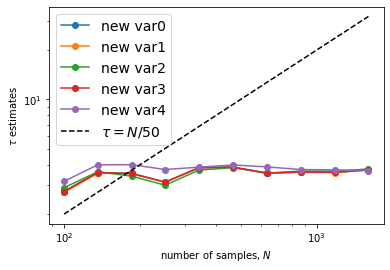

In [31]:
for var in range(n_dim):
    y = chains[burnin:,0,good_chains,var].T

    print(y.shape)
    # Compute the estimators for a few different chain lengths
    N = np.exp(np.linspace(np.log(100), np.log(y.shape[1]), 10)).astype(int)
    gw2010 = np.empty(len(N))
    new = np.empty(len(N))
    for i, n in enumerate(N):
        gw2010[i] = autocorr_gw2010(y[:, :n])
        new[i] = autocorr_new(y[:, :n])


    # Plot the comparisons
    # plt.loglog(N, gw2010, "o-", label="G&W 2010")
    plt.loglog(N, new, "o-", label=f"new var{var}")

plt.plot(N, N / 50.0, "--k", label=r"$\tau = N/50$")
# plt.axhline(true_tau, color="k", label="truth", zorder=-100)
plt.xlabel("number of samples, $N$")
plt.ylabel(r"$\tau$ estimates")
plt.legend(fontsize=14);

In [9]:
samp.shape

(188500, 5)

In [10]:
np.quantile(samp[:,-1], 0.95)

0.03025454050593246

In [12]:
covariance = np.cov(samp.T)


In [14]:
np.save("cov_null_test", covariance)

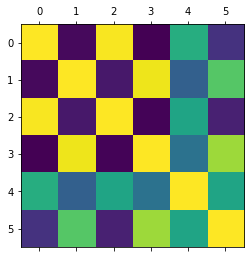

In [13]:
plt.matshow(np.corrcoef(samp.T) )